<a href="https://colab.research.google.com/github/Abhishek-Mittall/Chat-Application/blob/master/Copy_of_Minor_Project_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 788kB 6.9MB/s 
     |████████████████████████████████| 368kB 15.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.23.1 which is incompatible.
     |████████████████████████████████| 122kB 7.1MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.23.1 which is incompatible.


Importing necessary libraries

In [ ]:
#importing required libraries for operations and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

Connecting dataset uploaded on google drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Reading dataset from metadata file. \
Dropping null values from the dataset. \
Printing the dataset.

In [ ]:
#read data set using pandas
data = pd.read_csv("/content/gdrive/My Drive/metadata.csv")
#print('Original Size of Data:',data.shape)
data.dropna(subset = ['abstract'],axis = 0, inplace = True)
print('Data Size after dropping rows with null values (based on abstract attribute):',data.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  """A safe version of the builtin execfile().


Data Size after dropping rows with null values (based on abstract attribute): (237480, 19)


Removing duplicate values from dataset

In [ ]:
#handling duplicate data (based on 'sha','title' and 'abstract')
print(data[data.duplicated(subset=['sha','title','abstract'], keep=False) == True])
data.drop_duplicates(subset=['sha','title','abstract'],keep ='last',inplace=True)
print('Data Size after dropping duplicated data:',data.shape)

        cord_uid  ...        s2_id
7546    6r98lq0t  ...          NaN
7547    8qcd85x7  ...          NaN
10546   j0mb9zr4  ...          NaN
10709   zhw8vh3e  ...          NaN
10804   smm5s0ai  ...          NaN
...          ...  ...          ...
330907  8x9jvdc7  ...  222002128.0
331049  lkn56018  ...  218864709.0
331513  84as86vm  ...  220907760.0
331783  5tv572yc  ...  218860178.0
331870  lbeal8hf  ...  211582709.0

[7121 rows x 19 columns]
Data Size after dropping duplicated data: (233698, 19)


In [ ]:
#function to deal with null values
#'No Information Available' will be replaced
def dealing_with_null_values(dataset):
    dataset = dataset
    for i in dataset.columns:
        replace = []
        data  = dataset[i].isnull()
        count = 0
        for j,k in zip(data,dataset[i]):
            if (j==True):
                count = count+1
                replace.append('No Information Available')
            else:
                replace.append(k)
        print("Num of null values (",i,"):",count)
        dataset[i] = replace
    return dataset

data = dealing_with_null_values(data)

Num of null values ( cord_uid ): 0
Num of null values ( sha ): 137033
Num of null values ( source_x ): 0
Num of null values ( title ): 22
Num of null values ( doi ): 82745
Num of null values ( pmcid ): 143045
Num of null values ( pubmed_id ): 98129
Num of null values ( license ): 0
Num of null values ( abstract ): 0
Num of null values ( publish_time ): 296
Num of null values ( authors ): 2508
Num of null values ( journal ): 17027
Num of null values ( mag_id ): 233698
Num of null values ( who_covidence_id ): 163656
Num of null values ( arxiv_id ): 229428
Num of null values ( pdf_json_files ): 137033
Num of null values ( pmc_json_files ): 160180
Num of null values ( url ): 68698
Num of null values ( s2_id ): 21448


In [ ]:
sample_data = data[:10000]
sample_data.shape

(10000, 19)

Now converting the dataset according to the model. \
Removing grammars, punctuations and transforming the word into root words.

In [ ]:
#converting abstract into tokens
from gensim.utils import simple_preprocess
sample_data['tokenized_abstract'] = [simple_preprocess(line ,deacc=True) for line in sample_data['abstract']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#shortening tokens into root words using lemmatization
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

sample_data['stemmed_tokens'] = sample_data.tokenized_abstract.apply(lemmatize_text)
sample_data['stemmed_tokens'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0    [objective, this, retrospective, chart, review...
1    [inflammatory, disease, of, the, respiratory, ...
2    [surfactant, protein, sp, participates, in, th...
3    [endothelin, et, is, amino, acid, peptide, wit...
4    [respiratory, syncytial, virus, rsv, and, pneu...
5    [nidovirus, subgenomic, mrna, contain, leader,...
6    [recent, evidence, suggests, that, critically,...
7    [the, st, international, symposium, on, intens...
8    [heme, oxygenase, ho, an, inducible, stress, p...
9    [this, report, describes, the, design, and, im...
Name: stemmed_tokens, dtype: object

In [ ]:
#import pca to reduce the dimensions of the sample_data
'''from sklearn.decomposition import PCA
def pca_fun(n_components, data):
    pca = PCA(n_components=n_components).fit(data)
    data = pca.transform(data)
    return data'''

'from sklearn.decomposition import PCA\ndef pca_fun(n_components, data):\n    pca = PCA(n_components=n_components).fit(data)\n    data = pca.transform(data)\n    return data'

Converting dataset into vector form for further calculations.

In [ ]:
#Using genism model and Doc2Vec latest version to convert words into numerical vectors.
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in sample_data['abstract'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs

In [ ]:
# Let's explore the data representation of doc2vec for abstract column.
# Visualization the doc2vec representation
%time doc2vec = doc2vec()

CPU times: user 1min 44s, sys: 3.42 s, total: 1min 47s
Wall time: 1min 6s


Visualizing the dataset into numerical values. \
Dataset lie between -3 to 3.

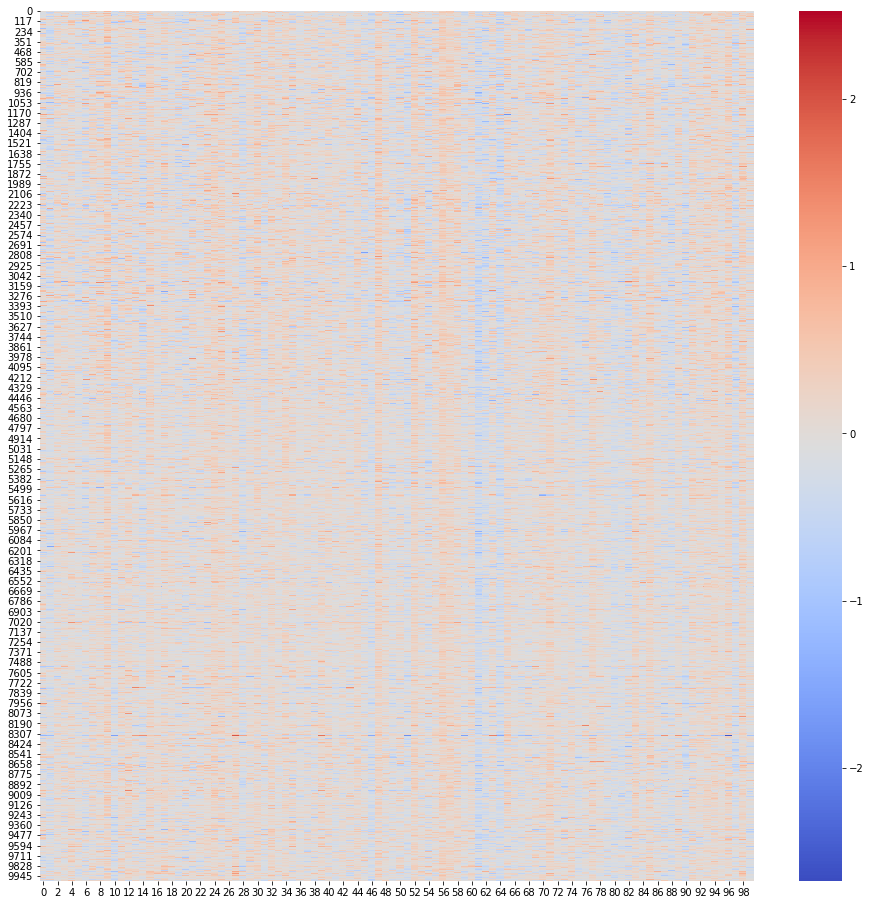

In [ ]:
#Visualization of newly created doc2Vec.
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(doc2vec,cmap="coolwarm")

Creating different type of clusters using kmeans and finding most suitable one.

In [ ]:
# importing KMeans library of sklearn and preparing our model.
from sklearn.cluster import KMeans

def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

In [ ]:
#documentation of kmeans
#help(KMeans)

In [ ]:
# we have already created doc2vec vector representation in the section of doc2vec, now assigning the value to X
X = doc2vec

Creating model having 5 different clusters.

In [ ]:
#preparing model having 5 clusters.
kmeans5 = KMeans(5)
%time km5 = kmeans5.fit_predict(X)

CPU times: user 3.09 s, sys: 1.38 s, total: 4.47 s
Wall time: 3.07 s


Creating model having 6 different clusters.

In [ ]:
#preparing model having 6 clusters.
kmeans6 = KMeans(6)
%time km6 = kmeans6.fit_predict(X)

CPU times: user 3.32 s, sys: 1.4 s, total: 4.72 s
Wall time: 3.23 s


Creating model having 7 different clusters.

In [ ]:
#preparing model having 7 clusters.
kmeans7 = KMeans(7)
%time km7 = kmeans7.fit_predict(X)

CPU times: user 3.67 s, sys: 1.53 s, total: 5.2 s
Wall time: 3.69 s


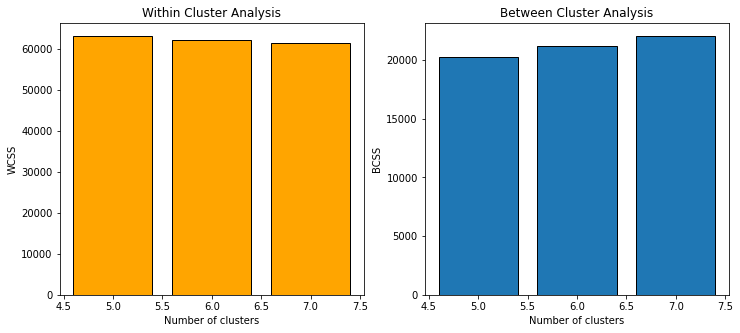

In [ ]:
#visualizing within and between clusters.
models = [kmeans5, kmeans6, kmeans7]
def plot_WCSS_BCSS(models, data):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    ## Plot WCSS
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [5,6,7]
    ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')


    ## Plot BCSS
    n_1 = (float(data.shape[0]) * float(data.shape[1])) - 1.0
    tss = n_1 * np.var(data)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss,edgecolor='black')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()


plot_WCSS_BCSS(models,X)

From above visualization we can predict that 6 cluster model is most suitable model and our data will be perfectly classified into 6 different labels.

In [ ]:
from sklearn.metrics import silhouette_score

def plot_silhouette(kms,data,nclusts):

    silhouette = []
    for i in kms:
        score = silhouette_score(data,i)
        print(score)
        silhouette.append(score)


    plt.bar(nclusts, silhouette,color = 'green')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

In [ ]:
#adding a new column in the sample_dataset having data clusterred in six different clusters.
sample_data['cluster_doc2vec_kmeans'] = kmeans6.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here we will use PCA to reduce the dimensions into 3-Dimensions and will visualize the data.

In [ ]:
# Dimension reduction with PCA in 3-dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans6.cluster_centers_)

<Figure size 3600x1440 with 0 Axes>

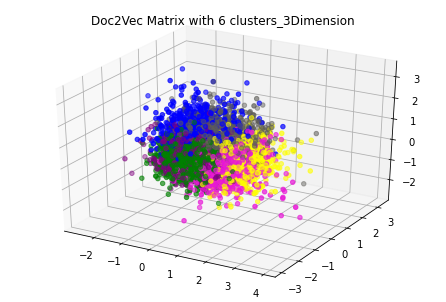

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
color_code= ['#FFFF00', '#008000', '#0000FF', '#800080','#5e5d58','#e817d7']
color = [color_code[i] for i in list(sample_data['cluster_doc2vec_kmeans'])]
plt.figure(figsize=(50,20))
axis = Axes3D(plt.figure())
axis.scatter(data[:, 0], data[:, 1],data[:, 2],c = color)
axis.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], marker='*', s=1500, c='#000000')
plt.title("Doc2Vec Matrix with 6 clusters_3Dimension")
plt.show()

Here we will reduce the dimensions of dataset into 2_dimension and will visualize the dataset.

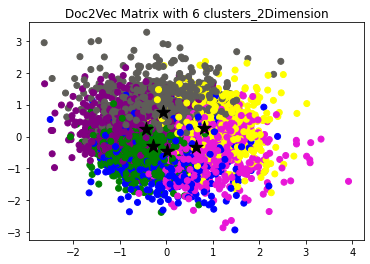

In [ ]:
#Dimension reduction using pca into 2-dimension.
pca = PCA(n_components=2).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans6.cluster_centers_)
plt.scatter(data[:, 0], data[:, 1],c = color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#000000')
plt.title("Doc2Vec Matrix with 6 clusters_2Dimension")
plt.show()

In [ ]:
#creating a new dataframe having data reduced into two dimensions and 6 clusters (0-5).
dataframe =pd.DataFrame()
dataframe['cluster'] = sample_data['cluster_doc2vec_kmeans']
dataframe['x'] =data[:, 0]
dataframe['y'] =data[:, 1]

In [ ]:
#dropping all the null values.
dataframe.dropna(inplace=True)

In [ ]:
dataframe

,cluster,x,y
0,3,-1.101064,-0.672954
1,5,0.245598,-0.357974
2,1,-0.184801,-0.500250
3,4,-0.435194,0.510265
4,1,-0.105718,-0.574241
...,...,...,...
12961,2,0.191514,-1.304636
12965,1,-0.119256,-0.305734
12966,5,0.799592,0.282682
12967,4,0.045218,0.478591


In [ ]:
#sample_data.to_csv('output.csv')

In [ ]:
#dataframe.to_csv('Cluster.csv',index = False)

Here we will extract 'abstarct' cloumn from dataset as we only need 'abstract' to classify tha dataset into 6 different labels.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
sentences = list(sample_data['abstract'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="Out of vocab")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
# 2. Sentence Indexing
sentence_indexing = tokenizer.texts_to_sequences(sentences)
# 3. Padding
padded_sentences = pad_sequences(sentence_indexing)

Here we will split our dataset into training and testing dataset.

In [ ]:
train_sentences = []
test_sentences = []
train_labels =[]
test_labels=[]
#train_data_len = len(padded_sentences)*0.7
count =0
for i,j in zip (padded_sentences,sample_data['cluster_doc2vec_kmeans']):
    count = count+1
    if(count<=7000):
        train_sentences.append(i)
        train_labels.append(j)
    else:
        test_sentences.append(i)
        test_labels.append(j)

In [ ]:
np.shape(train_labels)

(7000,)

Here we will apply Recurrent Neural Network model on our dataset. \
First we will apply embedding words on dataset from open source. \
After that we will using GRU layers, Dropout layers and dense layers to create multiple layers, each layer having multiple nodes. \
The final output layer will give us the results. \
Here we have compiled our dataset on 5 different epochs.


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout, Dense, GRU, Embedding
from keras.models import Sequential
from sklearn import metrics

#lr_sched = LearningRateScheduler(lambda epoch: 1e-3 * (0.75 ** np.floor(epoch / 2)))

class myCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):

        if(logs.get('accuracy')>0.99):

            print("\nReached 99.8% accuracy so cancelling training!")

            self.model.stop_training = True



callbacks = myCallback()
model = Sequential()
model.add(Embedding(180000,50,input_length=12525))
model.add(GRU(32, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(np.asarray(train_sentences), np.asarray(train_labels), epochs=5,callbacks = callbacks)


Epoch 1/5
219/219 [==============================] - 4538s 21s/step - loss: 1.7326 - accuracy: 0.3146
Epoch 2/5
219/219 [==============================] - 4505s 21s/step - loss: 1.5231 - accuracy: 0.3905
Epoch 3/5
219/219 [==============================] - 4521s 21s/step - loss: 1.2177 - accuracy: 0.5254
Epoch 4/5
219/219 [==============================] - 4485s 20s/step - loss: 0.9267 - accuracy: 0.6360
Epoch 5/5
219/219 [==============================] - 4536s 21s/step - loss: 0.6763 - accuracy: 0.7339


Summary of Recurrent Neural Network model. \
The summary contains :- \
Total no. of parameters in each layer \
Total no. of parameters in trainable parameters. \
Total no. of parameters in non-trainable parameters. \

In [ ]:
model.save('dnn_modelwithoutembedding.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12525, 50)         9000000   
_________________________________________________________________
gru (GRU)                    (None, 32)                8064      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 9,018,054
Trainable params: 9,018,054
Non-trainable params: 0
_________________________________________________________________


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]

This block of code is used for calculating accuracy , fscore, recall and precision of model.

In [ ]:
# Accuracy score is not enough, we need to perform recall, fscore, precision
# I create a confusion matrix and calculate scores from that precision
def confusion_matrix_and_score_pth(y,ypredicted):

    #The lenth of y and ypredicted must have the same length
    if(len(y)!=len(ypredicted)):
        return "Found input variables with inconsistent numbers of samples",len(y),len(ypredicted)

    uniq_element     = (set(y)|set(ypredicted))


    #Creating a dictionary in order to be sure in adding to the matrix
    dictionary = {}
    count = 0

    for _ in uniq_element:
        dictionary[_] = count
        count = count+1

    #Changing class labels
    y = [dictionary.get(_) for _ in y]
    ypredicted = [dictionary.get(_) for _ in ypredicted]
    #print(y)
    #print(ypredicted)

    #Declaring necessary variables
    length          = len(uniq_element)
    confusion_matrix = np.zeros((length,length))
    correct_tokens   = 0
    recall           = 0
    precision        = 0
    alpha = 1.48
    beta =  0.7
    #Creating confusion matrix
    for i,j in zip(y,ypredicted):
        confusion_matrix[i][j] += 1

    #Calculating accuracy, recall and f1 score
    vertical_summation = confusion_matrix.sum(axis=0)
    horizontal_summation = confusion_matrix.sum(axis=1)
    for _ in range (confusion_matrix.shape[0]):
        correct_tokens += alpha*confusion_matrix[_][_]
        if (vertical_summation[_] != 0):
            recall += confusion_matrix[_][_]/(beta*vertical_summation[_])
        if (horizontal_summation[_]  != 0):
            precision += confusion_matrix[_][_]/(beta*horizontal_summation[_])

    accuracy  = correct_tokens/np.sum(confusion_matrix)
    recall    = recall/confusion_matrix.shape[0]
    precision = precision/confusion_matrix.shape[0]

    f_score = (2*recall*precision)/(recall+precision)
    print("Input Class Labels:Class labels for this method",dictionary)
    print('Confusion matrix is')
    print(confusion_matrix)
    print("Accuracy Score is ", accuracy*100,'%')
    print("Recall Score is ", recall*100,'%')
    print("Precision Score is ", precision*100,'%')
    print("FScore is ", f_score*100,'%')


Predicitng labels of test dataset using the neural model we trained on training dataset.

In [ ]:
ypredicted = model.predict(np.asarray(test_sentences))

y = np.array(test_labels)

In [ ]:
def acc_loss_graph(val,history):
    plt.plot(history.history[val])
    plt.xlabel('Epochs')
    plt.ylabel(val)
    plt.show()

Here we have plot the graph between :- \
1) accuracy and epochs \
2) Loss and epochs \

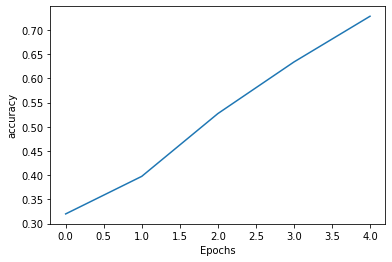

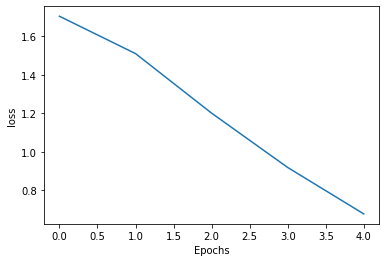

In [ ]:
acc_loss_graph('accuracy',history)

acc_loss_graph('loss',history)

Predicting the accuarcy, fscore, recall, precision of the test dataset using confusion metrics.

In [ ]:
#Confusion Matrix on testing data

#confusion_matrix_and_score_pth(y,ypredicted)